# Tema 6 : Deep learning

Un **tensor** es cierta clase de entidad algebraica que generaliza los conceptos de escalar,
vector y matriz de una forma que sea independiente de cualquier sistema de
coordenadas elegido.

<p>TensorFlow puede entrenar y ejecutar redes neuronales profundas que pueden ser usadas para desarrollar varias aplicaciones de IA. TensorFlow es ampliamente utilizado en el campo de la investigación y aplicación del machine learning.</p>

<p>TensorFlow fue lanzado en 2015 como una herramienta de código abierto por Google. Inicialmente estaba disponible en Python. Posteriormente se lanzó TensorFlow.js para su uso mediante JavaScript, bien sea en el mismo navegador o bien del lado del
servidor mediante Node.js o incluso en una Raspberry Pi. Más tarde se lanzó
TensorFlow 2.0, disponible para <code>C++</code>, <code>Haswell</code>,<code> Java</code>, <code>Go</code> y <code>Rust</code>. También hay bibliotecas de terceros para <code>C#</code>, <code>R</code> y <code>Scala</code></p>

<p>Existen versiones de TensorFlow para Windows, Linux y Mac. Además, TensorFlow Lite es la versión de TensorFlow para su uso en terminales móviles o en dispositivos en el borde la red (Edge Computing), incluyendo escenarios Internet of Things.</p>

<p>Más aún, Google lanzó en 2016 su unidad de procesamiento tensorial (TPU), un circuito ASIC (Circuito Integrado de Aplicación Específicas) personalizada específicamente para machine learning y adaptada para TensorFlow. El TPU es un acelerador de IA programable diseñado para proporcionar alto throughput de aritmética de precisión baja (por ejemplo, 8 bits) y orientado para utilizar o correr modelos más que para entrenarlos. Este tipo de unidades tienen un rendimiento de machine learning por vatio consumido de un orden mayor de magnitud que los
sistemas tradicionales. Google Cloud ofrece el uso de TPU en la nube que pueden ser empleados por el público general.</p>

<p>Asimismo, Google lanzó los Edge TPU, dispositivos que incluyen una CPU, una GPU y una TPU para aplicar TensorFlow en el Edge. Se pueden considerar una especie de Raspberry Pi con TPU incluida para ejecutar machine learning en el extremo de la red.</p>

<b>Nota: es necesario instalar el paquete tensorflow o tensorflow‐gpu para el funcionamiento del siguiente ejemplo (instalará más de 400MB en el ordenador, incluyendo dependencias, como parte de Keras). Además, bajo Windows es necesario contar con la última versión de Visual C++ Redistributable para su funcionamiento, disponible en:</b>
https://support.microsoft.com/en-us/help/2977003/the-latest-supported-visual-cdownloads

Vamos a realizar un ejemplo de identificación de ropa en imágenes mediante redes
neuronales, siguiendo el tutorial de TensorFlow 2.0 del portal de librería (ver Webgrafía al final del Tema).Además de TensorFlow, es necesario tener instaladas otras librerías que ya deberíamos haber instalado también de los ejemplos de los temas anteriores: <code>keras</code>, <code>numpy</code> y <code>matplotlib</code>.

Vamos a utilizar el dataset Fashion-MNIST (imágenes de ropa), que sustituye al clásico MNIST (dígitos escritos a mano). Este dataset contiene 70 000 imágenes de ropa utilizando una baja resolución (28 × 28 píxeles y 8 bit por píxel, en escala de grises, es decir, conteniendo un valor de entre 0 y 255 por píxel) clasificadas en 10 categorías.

De este dataset utilizaremos 60 000 imágenes para el entrenamiento de nuestra red neuronal y los 10 000 restantes para el test de la misma.

Exploremos en primer lugar los datos. Con el siguiente código obtendremos los siguientes arrays:
<ul>
<li><code>train_images</code>: array con las imágenes del training dataset (28 × 28 con un
entero entre 0 y 255).</li>
<li><code>train_labels</code>: array con las etiquetas del training dataset, un valor de 0 a 9.</li>
<li><code>test_images</code>: array con las imágenes del test dataset.</li>
<li><code>test_labels</code>: array con las etiquetas del test dataset.</li>
 </ul>

In [28]:
import sys
#Instalar keras y tensorflow
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
# hay 60 000 imágenes en el training dataset
print(train_images.shape)
#> (60000, 28, 28)
print(len(train_labels))
#> 60000
# cada etiqueta es un número entre 0 y 9

(60000, 28, 28)
60000


In [4]:
print(train_labels)
#> [9, 0, 0, ..., 3, 0, 5]
# hay 10 000 imágenes en el test dataset
print(test_images.shape)
#> (10000, 28, 28)
print(len(test_labels))

[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


<p>Veremos una imagen como la siguiente, en la que vemos los 28 × 28 píxeles, cada uno con un valor entre 0 y 255</p>

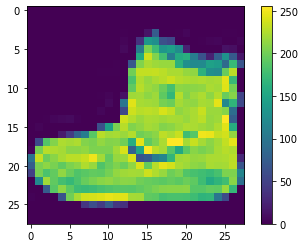

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<p>Normalizaremos los valores, tanto del training dataset como del test dataset, para que se encuentren entre 0 y 1 antes de ser usados por la red neuronal. Dividimos por 255.0 cada valor de los píxeles. Aprovechamos para ver el contenido de las 25 primeras
imágenes:</p>

In [6]:
# normalizamos
train_images = train_images / 255.0
test_images = test_images / 255.0

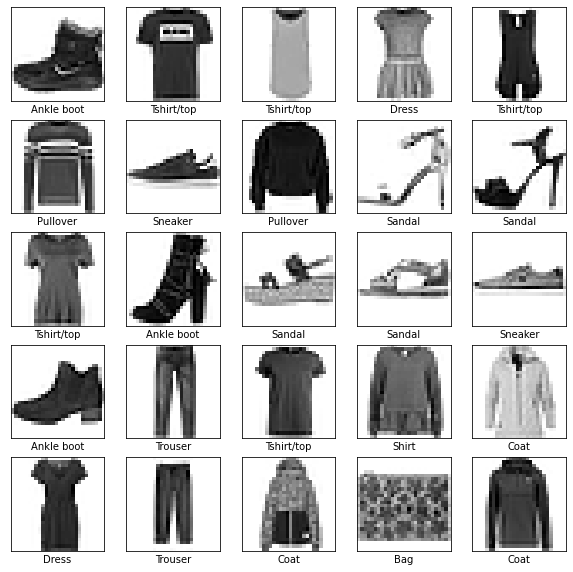

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<p>Ahora vamos a construir el modelo. Utilizaremos una red neuronal con 28 × 28 = 784
neuronas en la capa de entrada, es decir, aplanamos el array bidimensional en un array
unidimensional. Para ello utilizamos una capa de entrada
<code>tf.keras.layers.Flatten</code>.</p>

<p>Tras dicha capa, empleamos dos capas ocultas de tipo tf.keras.layers.Dense, en las cuales todas las neuronas están plenamente conectadas con las capas anterior y posterior (conexión densa). La primera capa tendrá 128 nodos, y la segunda y última tendrá 10 nodos softmax (o función exponencial normalizada, que es una generalización de la función logística), que devuelve un array con 10 probabilidades que sumarán 1 en total. Así, tendremos a la salida las probabilidades de que la imagen de entrada se corresponda con cada una de las 10 clases.</p>
La función softmax tiene una forma similar a:

\begin{equation}
softmax(x_i) = \frac{exp(x_i)}{\sum_j(x_j)}
\end{equation}


<p>Tras la construcción del modelo hemos de compilarlo. En ese momento, elegiremos la función de pérdidas a minimizar, ya que es la que mide cuán exacto será nuestro modelo, el métodooptimizador empleado (usaremos el de Adam) y la métrica empleada para monitorizar las etapas de entrenamiento y test (usaremos la exactitud – accuracy)</p>.
<p>El siguiente código muestra el proceso de construcción, compilación, entrenamiento, evaluación de exactitud, así como predicción de una clase con una muestra concreta y también de forma gráfica para las 15 primeras.</p>


In [8]:
# Creamos el modelo:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])
# Compilamos el modelo:

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Entrenamos el modelo:
model.fit(train_images, train_labels, epochs=10)
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print("\nTest accuracy:", test_acc)
#> Test accuracy: 0.8848999738693237
# Realizamos predicciones, mostrando la predicción sobre el primer elemento
predictions = model.predict(test_images)
# mostramos las 10 probabilidades
print(predictions[0])
#> [4.3090558e-09 5.8588463e-09 2.3414977e-09 1.4041760e-07 5.7719642e-09
#> 1.0011349e-04 4.5159254e-07 2.3861572e-02 1.9545018e-07 9.7603750e-01]
# nos quedamos con la más elevada
print(np.argmax(predictions[0]))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4943 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3700 - accuracy: 0.8661: 0s - l
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3076 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - los

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

In [11]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

<p>Además de la salida de texto indicada como comentarios en el código, veremos una
figura como la siguiente:</p>

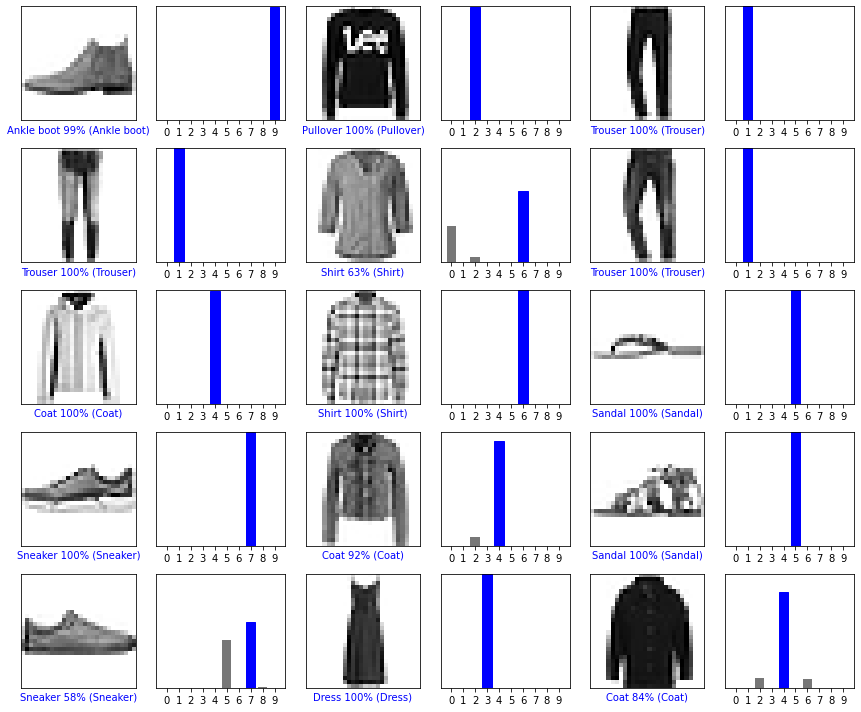

In [12]:
# Mostraremos las primeras 15 imágenes de test con sus predicciones y sus etiquetas reales
# En azul las predicciones correctas y en rojo las incorrectas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

<p>Vemos que la precisión sobre los datos de test (88.49 %) es algo menor que con los datos de entrenamiento (llegamos a 91.03 % en la época 10). Esto quiere decir quetenemos algo de overfitting o sobreajuste.</p>